In [70]:
def selection_network(arr, k):
    n = len(arr)
    if n == 1:
        return arr[0], 0, 0  # No comparators used for a single-element array
    mid = n // 2
    left = arr[:mid]
    right = arr[mid:]
    cost = 0
    for i in range(mid):
        if left[i] > right[i]:
            left[i], right[i] = right[i], left[i]
        cost += 1  # Increment cost for each comparison
    delay = 1  # At least one comparison was made
    if k <= mid:
        val, left_cost, left_delay = selection_network(left, k)
        cost += left_cost
        delay = max(delay, left_delay + 1)  # Increment delay if we go deeper
    else:
        val, right_cost, right_delay = selection_network(right, k - mid)
        cost += right_cost
        delay = max(delay, right_delay + 1)  # Increment delay if we go deeper
    return val, cost, delay

# Test the function
arr = [3,5,6,4,2,1]
k = 3
val, cost, delay = selection_network(arr, k)
print(f"Value: {val}, Cost: {cost}, Delay: {delay}")

Value: 3, Cost: 5, Delay: 3


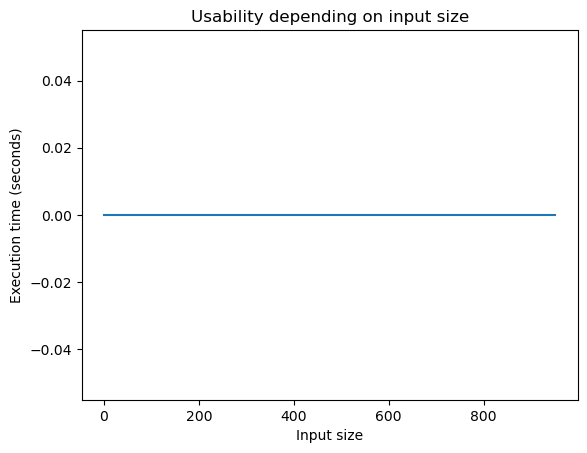

In [2]:
import matplotlib.pyplot as plt
import time
import random

def measure_time(func, *args):
    start_time = time.time()
    func(*args)
    end_time = time.time()
    return end_time - start_time

# Generate random arrays of different sizes
sizes = list(range(1, 1001, 50))
times = []

for size in sizes:
    arr = random.sample(range(1, 10001), size)
    k = random.randint(1, size)
    exec_time = measure_time(selection_network, arr, k)
    times.append(exec_time)

# Plot the results
plt.plot(sizes, times)
plt.xlabel('Input size')
plt.ylabel('Execution time (seconds)')
plt.title('Usability depending on input size')
plt.show()

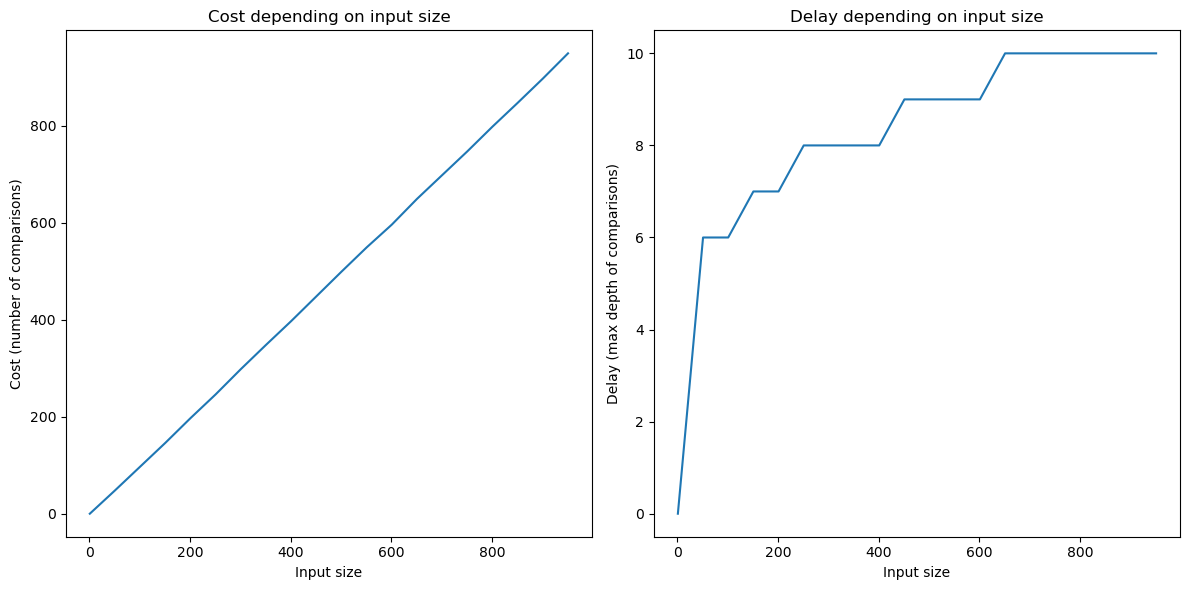

In [72]:
import matplotlib.pyplot as plt
import random

# Generate random arrays of different sizes
sizes = list(range(1, 1001, 50))
costs = []
delays = []

for size in sizes:
    arr = random.sample(range(1, 10001), size)
    k = random.randint(1, size)
    _, cost, delay = selection_network(arr, k)
    costs.append(cost)
    delays.append(delay)

# Plot the cost results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sizes, costs)
plt.xlabel('Input size')
plt.ylabel('Cost (number of comparisons)')
plt.title('Cost depending on input size')

# Plot the delay results
plt.subplot(1, 2, 2)
plt.plot(sizes, delays)
plt.xlabel('Input size')
plt.ylabel('Delay (max depth of comparisons)')
plt.title('Delay depending on input size')

plt.tight_layout()
plt.show()

In [1]:
def gray_to_int(gray):
    binary = gray[0]
    for i in range(1, len(gray)):
        binary += str(int(binary[i - 1]) ^ int(gray[i]))
    #print(gray,int(binary, 2))
    return int(binary, 2)

In [5]:
def selection_network_gray(arr, k, is_gray=True):
    # Convert Gray codes to integers only in the first call
    if is_gray:
        arr = [gray_to_int(g) for g in arr]
        

    n = len(arr)
    if n == 1:
        return arr[0], 0, 0  # No comparators used for a single-element array
    mid = n // 2
    left = arr[:mid]
    right = arr[mid:]
    cost = 0
    for i in range(mid):
        if left[i] > right[i]:
            left[i], right[i] = right[i], left[i]
        cost += 1  # Increment cost for each comparison
    delay = 1  # At least one comparison was made
    if k <= mid:
        val, left_cost, left_delay = selection_network_gray(left, k, is_gray=False)
        cost += left_cost
        delay = max(delay, left_delay + 1)  # Increment delay if we go deeper
    else:
        val, right_cost, right_delay = selection_network_gray(right, k - mid, is_gray=False)
        cost += right_cost
        delay = max(delay, right_delay + 1)  # Increment delay if we go deeper
    return val, cost, delay



In [6]:
# Test the function
arr = ['00', '01', '11', '10']  # Gray codes for 0, 1, 2, 3
k = 2
val, cost, delay = selection_network_gray(arr, k)
print(f"Value two bits: {val}, Cost: {cost}, Delay: {delay}")

arr = ['000', '001', '011', '010', '110', '111', '101', '100']  # Gray codes for 0, 1, 2, 3, 4, 5, 6, 7
k = 2
val, cost, delay = selection_network_gray(arr, k)
print(f"Value three bits: {val}, Cost: {cost}, Delay: {delay}")

Value two bits: 1, Cost: 3, Delay: 2
Value three bits: 1, Cost: 7, Delay: 3


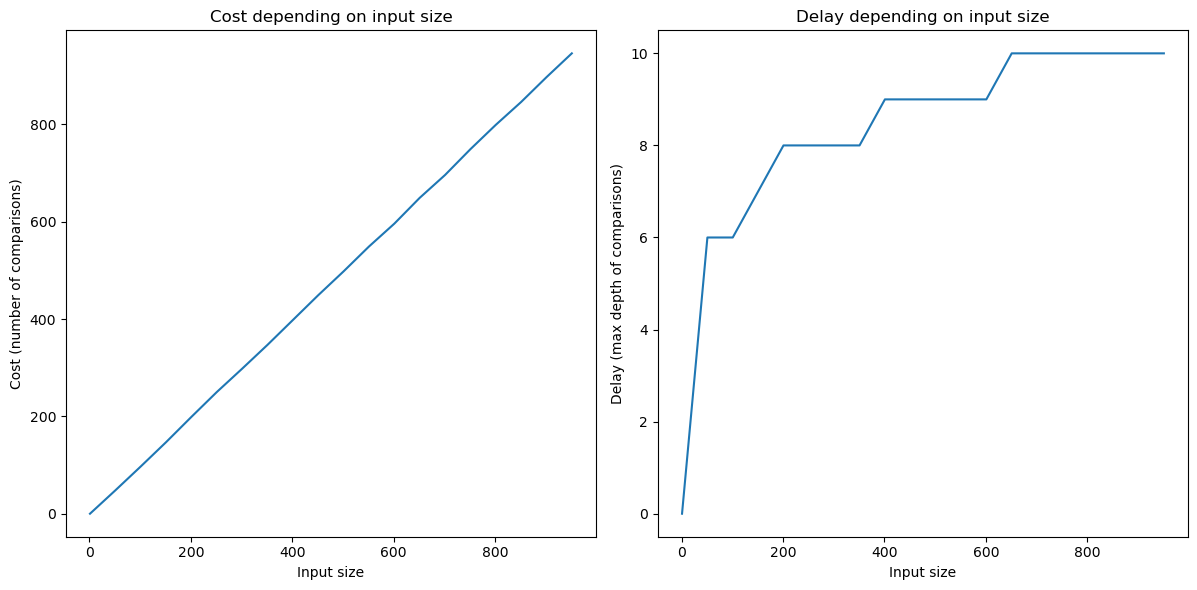

In [74]:
import matplotlib.pyplot as plt
import random
import time

def measure_time(func, *args):
    start_time = time.time()
    func(*args)
    end_time = time.time()
    return end_time - start_time

# Generate random arrays of different sizes
sizes = list(range(1, 1001, 50))
times = []
costs = []
delays = []

for size in sizes:
    # Generate random Gray codes
    arr = [format(i ^ (i >> 1), "0" + str(size) + "b") for i in range(size)]
    k = random.randint(1, size)
    exec_time = measure_time(selection_network_gray, arr, k)
    _, cost, delay = selection_network_gray(arr, k)
    times.append(exec_time)
    costs.append(cost)
    delays.append(delay)

# Plot the results
plt.figure(figsize=(18, 6))
'''
plt.subplot(1, 3, 1)
plt.plot(sizes, times)
plt.xlabel('Input size')
plt.ylabel('Execution time (seconds)')
plt.title('Execution time depending on input size')
'''
plt.subplot(1, 3, 1)
plt.plot(sizes, costs)
plt.xlabel('Input size')
plt.ylabel('Cost (number of comparisons)')
plt.title('Cost depending on input size')

plt.subplot(1, 3, 2)
plt.plot(sizes, delays)
plt.xlabel('Input size')
plt.ylabel('Delay (max depth of comparisons)')
plt.title('Delay depending on input size')

plt.tight_layout()
plt.show()

# metastability contain

In [15]:
def custom_compare(code1, code2):
    order = {'1': 3, 'M': 1, '0': 2} # Define the order of the bits
    # 1>0>M 0 bigger then M becuase if it will compare between 
    # 000 to 00M so this not go her but if it compare 
    # 01m to 010 so 010 bigger
    for bit1, bit2 in zip(code1, code2):
        if order[bit1] > order[bit2]:
            return 1
        elif order[bit1] < order[bit2]:
            return -1
    return 0

def compare_gray_codes(code1, code2):
    # Generate two versions of each code if it contains 'M'
    codes1 = [code1.replace('M', '0'), code1.replace('M', '1')]
    codes2 = [code2.replace('M', '0'), code2.replace('M', '1')]
    # Compare the maximum of these two versions for each code
    max_code1 = max(codes1, key=gray_to_int)
    max_code2 = max(codes2, key=gray_to_int)
    # If one code is greater than the other, return 1 or -1 accordingly
    if gray_to_int(max_code1) > gray_to_int(max_code2):
        print(f"{max_code1} ({gray_to_int(max_code1)}) > {max_code2} ({gray_to_int(max_code2)})")
        return 1
    elif gray_to_int(max_code1) < gray_to_int(max_code2):
        print(f"{max_code1} ({gray_to_int(max_code1)}) < {max_code2} ({gray_to_int(max_code2)})")
        return -1
    # If both codes are equal, compare the original codes using the custom comparison function
    else:
        return custom_compare(code1, code2)

In [16]:
def is_increasing(seq):
    return all(compare_gray_codes(x, y) <= 0 for x, y in zip(seq, seq[1:]))

def is_decreasing(seq):
    return all(compare_gray_codes(x, y) >= 0 for x, y in zip(seq, seq[1:]))

def is_bitonic(seq):
    if is_increasing(seq) or is_decreasing(seq):
        return True
    increasing = False
    changes = 0
    for i in range(len(seq) - 1):
        if compare_gray_codes(seq[i], seq[i+1]) < 0:
            if not increasing:
                increasing = True
                changes += 1
        elif compare_gray_codes(seq[i], seq[i+1]) > 0:
            if increasing:
                increasing = False
                changes += 1
        if changes > 2:
            return False
    return True

In [17]:
def make_bitonic(arr):
    n = len(arr)
    mid = n // 2

    # First half
    for i in range(mid - 1):
        if arr[i] > arr[i + 1]:
            arr[i], arr[i + 1] = arr[i + 1], arr[i]
        if arr[i + mid] < arr[i + mid + 1]:
            arr[i + mid], arr[i + mid + 1] = arr[i + mid + 1], arr[i + mid]

    # Second half
    for i in range(mid):
        for j in range(i + 1, mid):
            if arr[i] > arr[j]:
                arr[i], arr[j] = arr[j], arr[i]
            if arr[i + mid] < arr[j + mid]:
                arr[i + mid], arr[j + mid] = arr[j + mid], arr[i + mid]

    return arr

In [18]:
arr = [30, 70, 40, 80, 60, 20, 10, 50]
sorted_arr = make_bitonic(arr)
print(sorted_arr)  

[30, 40, 70, 80, 60, 50, 20, 10]


In [19]:
def bitonic_sequence(arr, compare):
    def swap_if_needed(a, b, asc=True):
        if (compare(a, b) > 0) == asc:
            return b, a
        return a, b

    # Pad the array if necessary
    original_length = len(arr)
    while len(arr) % 8 != 0:
        arr.append('0')

    # Split the array into two halves
    first_half = arr[:len(arr)//2]
    second_half = arr[len(arr)//2:]

    # For the first half, compare and swap a1 with a2 and a3 with a4
    first_half[0], first_half[1] = swap_if_needed(first_half[0], first_half[1])
    first_half[2], first_half[3] = swap_if_needed(first_half[2], first_half[3])

    # Then compare and swap a1 with a3 and a2 with a4
    first_half[0], first_half[2] = swap_if_needed(first_half[0], first_half[2])
    first_half[1], first_half[3] = swap_if_needed(first_half[1], first_half[3])

    # Finally, compare and swap a2 with a3
    first_half[1], first_half[2] = swap_if_needed(first_half[1], first_half[2])

    # For the second half, perform the same comparisons and swaps but in reverse order
    second_half[0], second_half[1] = swap_if_needed(second_half[0], second_half[1], False)
    second_half[2], second_half[3] = swap_if_needed(second_half[2], second_half[3], False)
    second_half[0], second_half[2] = swap_if_needed(second_half[0], second_half[2], False)
    second_half[1], second_half[3] = swap_if_needed(second_half[1], second_half[3], False)
    second_half[1], second_half[2] = swap_if_needed(second_half[1], second_half[2], False)

    # Concatenate the two halves to form a bitonic sequence
    bitonic_seq = first_half + second_half

    # Remove the padding elements from the end of the array
    bitonic_seq = bitonic_seq[:original_length]

    return bitonic_seq

arr = ['100','00M', '0M1','11M', '1M1', '10M', '01M', 'M10' ]
print(bitonic_sequence(arr, compare_gray_codes))  # Output depends on the implementation of gray_to_int and compare_gray_codes

100 (7) > 001 (1)
011 (2) < 111 (5)
001 (1) < 011 (2)
100 (7) > 111 (5)
111 (5) > 011 (2)
101 (6) < 100 (7)
010 (3) < 110 (4)
100 (7) > 110 (4)
101 (6) > 010 (3)
101 (6) > 110 (4)
['00M', '0M1', '11M', '100', '10M', '1M1', 'M10', '01M']


In [20]:
#arr = ['0011', '0111', '0100','1101', '1100', '0101','0110', '0001']  # Gray codes for 0, 1, 2, 3, 4, 5, 6, 7
#arr = ['001', '110','011','010']
#0.5 1.5 2.5 3.5 4.5 5.5 6.5 7
#arr = ['00M', '0M1', '01M', 'M10','11M', '1M1', '10M','100' ]
#arr = ['100', '10M' , '1M1', '11M', 'M10', '01M', '0M1', '00M']
#6.5 4.5 2.5 0.5 1.5 3.5 5.5 7
# same idea of 4 1 2 5 7 9 8 6
arr = [ '01M', '00M', '0M1', 'M10', '1M1', '100','10M', '11M']
# SAME IDEA OF 1 4 2 3
arr = ['00M', '01M', '0M1', 'M10']
# Test the function
is_bitonic(arr)

001 (1) < 010 (3)
010 (3) > 011 (2)
001 (1) < 010 (3)
001 (1) < 010 (3)
010 (3) > 011 (2)
010 (3) > 011 (2)
011 (2) < 110 (4)


False

In [2]:
def custom_compare(code1, code2):
    order = {'1': 3, 'M': 1, '0': 2} # Define the order of the bits
    # 1>0>M 0 bigger then M becuase if it will compare between 
    # 000 to 00M so this not go her but if it compare 
    # 01m to 010 so 010 bigger
    for bit1, bit2 in zip(code1, code2):
        if order[bit1] > order[bit2]:
            return 1
        elif order[bit1] < order[bit2]:
            return -1
    return 0

def compare_gray_codes(code1, code2):
    cost = 0
    if 'M' in code1 or 'M' in code2:
        codes1 = [code1.replace('M', '0'), code1.replace('M', '1')]
        codes2 = [code2.replace('M', '0'), code2.replace('M', '1')]
        cost += 2  # Cost for two replace operations
        max_code1 = max(codes1, key=gray_to_int)
        max_code2 = max(codes2, key=gray_to_int)
        cost += 2  # Cost for two max operations
    else:
        max_code1 = code1
        max_code2 = code2
    if gray_to_int(max_code1) > gray_to_int(max_code2):
        cost += 1  # Cost for comparison
        return 1, cost
    elif gray_to_int(max_code1) < gray_to_int(max_code2):
        cost += 1  # Cost for comparison
        return -1, cost
    else:
        cost += 1  # Cost for comparison
        custom_compare_result = custom_compare(code1, code2)
        cost += len(code1)  # Cost for custom comparison (worst case)
        return custom_compare_result, cost

In [12]:
def selection_network_gray_metastabily(arr, k):
    n = len(arr)
    if n == 1:
        return arr[0], 0, 0  # No comparators used for a single-element array
    mid = n // 2
    left = arr[:mid]
    right = arr[mid:]
    cost = 0
    for i in range(mid):
        comparison, cost_temp = compare_gray_codes(left[i], right[i])
        cost += cost_temp  # Increment cost for each comparison
        if comparison > 0:
            left[i], right[i] = right[i], left[i]
    delay = 1  # At least one comparison was made
    if k <= mid:
        val, left_cost, left_delay = selection_network_gray_metastabily(left, k)
        cost += left_cost
        delay = max(delay, left_delay + 1)  # Increment delay if we go deeper
    else:
        val, right_cost, right_delay = selection_network_gray_metastabily(right, k - mid)
        cost += right_cost
        delay = max(delay, right_delay + 1)  # Increment delay if we go deeper
    return val, cost, delay

In [4]:
arr = ['100','00M', '0M1','11M', '1M1', '10M', '01M', 'M10' ]  # Gray codes for 0, 1, 2, 3, 4, 5, 6, 7
arr2 = ['0110', '0001','0011', '0111', '0100','1101', '1100', '0101']
k = 8
val, cost, delay = selection_network_gray_metastabily(arr, k)
val2, cost2, delay2 = selection_network_gray_metastabily(arr2, 1)
print(f"Value of {k} position: {val}, Cost: {cost}, Delay: {delay}")
print(f"Value of {1} position: {val2}, Cost: {cost2}, Delay: {delay2}")
arr = ['0M', 'M1', '1M']  # Gray codes for 0, 1, 2, 3
k = 2
val, cost, delay = selection_network_gray_metastabily(arr, k)
print(f"Value: {val}, Cost: {cost}, Delay: {delay}")

Value of 8 position: 100, Cost: 38, Delay: 3
Value of 1 position: 0001, Cost: 7, Delay: 3
Value: M1, Cost: 10, Delay: 2


Size: 3, Metastable Gray codes: ['0M', 'M1', '1M']
Cost: 5, Delay: 1
Size: 7, Metastable Gray codes: ['00M', '0M1', '01M', 'M10', '11M', '1M1', '10M']
Cost: 25, Delay: 3
Size: 15, Metastable Gray codes: ['000M', '00M1', '001M', '0M10', '011M', '01M1', '010M', 'M100', '110M', '11M1', '111M', '1M10', '101M', '10M1', '100M']
Cost: 65, Delay: 4
Size: 31, Metastable Gray codes: ['0000M', '000M1', '0001M', '00M10', '0011M', '001M1', '0010M', '0M100', '0110M', '011M1', '0111M', '01M10', '0101M', '010M1', '0100M', 'M1000', '1100M', '110M1', '1101M', '11M10', '1111M', '111M1', '1110M', '1M100', '1010M', '101M1', '1011M', '10M10', '1001M', '100M1', '1000M']
Cost: 150, Delay: 5
Size: 63, Metastable Gray codes: ['00000M', '0000M1', '00001M', '000M10', '00011M', '0001M1', '00010M', '00M100', '00110M', '0011M1', '00111M', '001M10', '00101M', '0010M1', '00100M', '0M1000', '01100M', '0110M1', '01101M', '011M10', '01111M', '0111M1', '01110M', '01M100', '01010M', '0101M1', '01011M', '010M10', '01001M', 

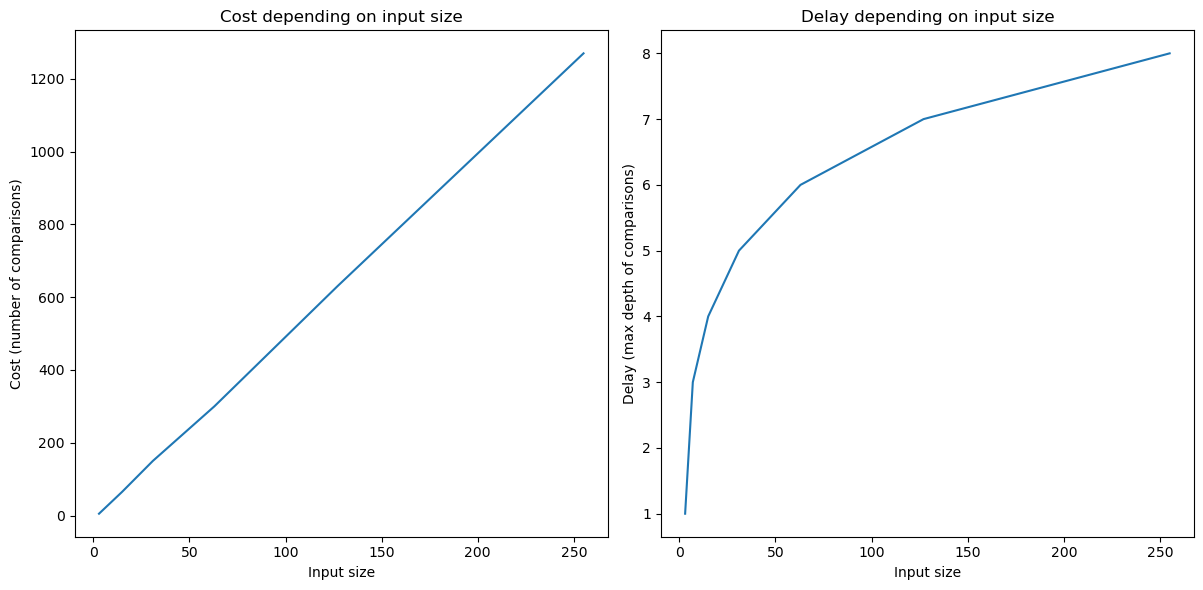

In [13]:
import math
import random
import matplotlib.pyplot as plt
def generate_metastable_gray_codes(gray_codes):
    metastable_gray_codes = []
    for i in range(len(gray_codes) - 1):
        code1 = gray_codes[i]
        code2 = gray_codes[i + 1]
        metastable_code = ''
        for bit1, bit2 in zip(code1, code2):
            if bit1 == bit2:
                metastable_code += bit1
            else:
                metastable_code += 'M'
        metastable_gray_codes.append(metastable_code)
    return metastable_gray_codes

# Generate random arrays of different sizes
#sizes = list(range(2, 9))  # Sizes from 2 to 8
times = []
costs = []
delays = []

# Generate arrays of different sizes
sizes = [2**n - 1 for n in range(2, 9)]  # Sizes from 2^2 - 1 to 2^8 - 1

for size in sizes:
    # Generate standard Gray codes
    n = int(math.log2(size + 1))  # Calculate n from size
    gray_codes = [format(i ^ (i >> 1), "0" + str(n) + "b") for i in range(2 ** n)]
    # Generate metastable Gray codes
    arr = generate_metastable_gray_codes(gray_codes)
    print(f"Size: {len(arr)}, Metastable Gray codes: {arr}")
    k = random.randint(1, len(arr))
    #exec_time = measure_time(selection_network_gray, arr, k)
    _, cost, delay = selection_network_gray(arr, k)
    print(f"Cost: {cost}, Delay: {delay}")
    #times.append(exec_time)
    costs.append(cost)
    delays.append(delay)

# Plot the results
plt.figure(figsize=(18, 6))
'''
plt.subplot(1, 3, 1)
plt.plot(sizes, times)
plt.xlabel('Input size')
plt.ylabel('Execution time (seconds)')
plt.title('Execution time depending on input size')
'''
plt.subplot(1, 3, 1)
plt.plot(sizes, costs)
plt.xlabel('Input size')
plt.ylabel('Cost (number of comparisons)')
plt.title('Cost depending on input size')

plt.subplot(1, 3, 2)
plt.plot(sizes, delays)
plt.xlabel('Input size')
plt.ylabel('Delay (max depth of comparisons)')
plt.title('Delay depending on input size')

plt.tight_layout()
plt.show()